まずは、データの概観をつかむ。

In [1]:
d <- read.csv('data5.csv')
summary(d)

       N           y              x           id        
 Min.   :8   Min.   :0.00   Min.   :2   Min.   :  1.00  
 1st Qu.:8   1st Qu.:1.00   1st Qu.:3   1st Qu.: 25.75  
 Median :8   Median :3.00   Median :4   Median : 50.50  
 Mean   :8   Mean   :3.81   Mean   :4   Mean   : 50.50  
 3rd Qu.:8   3rd Qu.:7.00   3rd Qu.:5   3rd Qu.: 75.25  
 Max.   :8   Max.   :8.00   Max.   :6   Max.   :100.00  

生存種子数 y は二項分布に従うとして、fitting を行う。

In [2]:
fit <- glm(cbind(y, N-y) ~ x, data=d, family=binomial)
fit


Call:  glm(formula = cbind(y, N - y) ~ x, family = binomial, data = d)

Coefficients:
(Intercept)            x  
    -2.1487       0.5104  

Degrees of Freedom: 99 Total (i.e. Null);  98 Residual
Null Deviance:	    607.4 
Residual Deviance: 513.8 	AIC: 649.6

fitting は行われたが、真の傾き$\hat{\beta}_2=1$と比べると推定値$\beta_2=0.51$は小さい。

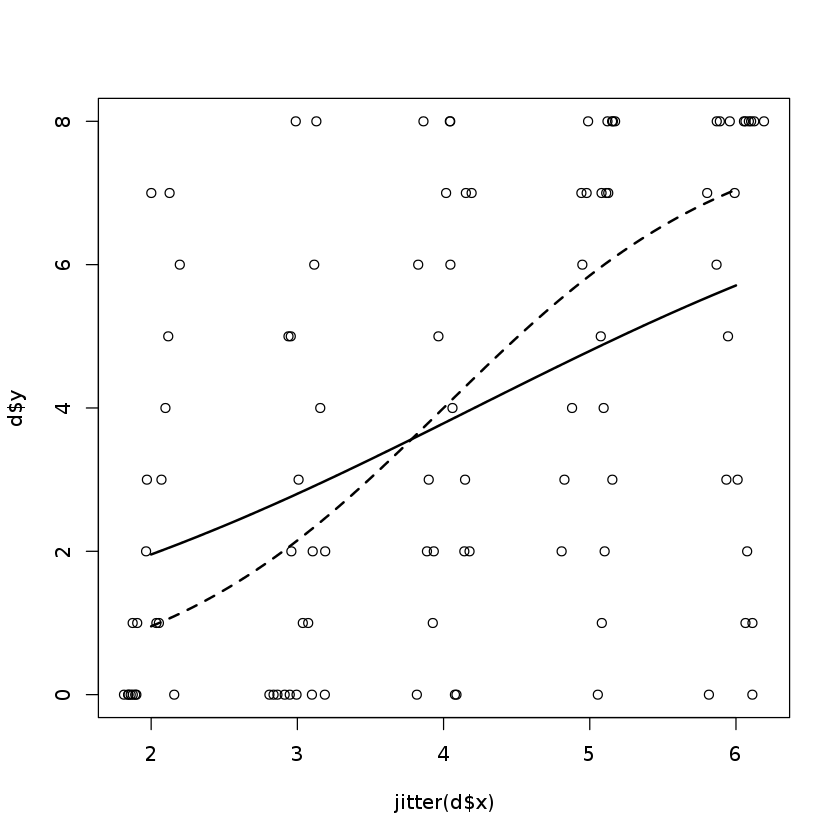

In [3]:
logistic <- function(z) 1 / (1 + exp(-z))
plot(jitter(d$x), d$y)
xx <- seq(min(d$x), max(d$x), length=100)
lines(xx, logistic(-2.1487 + 0.5104 * xx)*d$N, lwd=2)
lines(xx, logistic(-4 + 1 * xx)*d$N, lwd=2, lty=2)

$x_i=4$である個体に絞って見てみるとどうか？
本来は線で示した二項分布に乗るはずだが、実際は大きく異なる分布を見せている。

       N           y              x           id       
 Min.   :8   Min.   :0.00   Min.   :4   Min.   :41.00  
 1st Qu.:8   1st Qu.:2.00   1st Qu.:4   1st Qu.:45.75  
 Median :8   Median :3.50   Median :4   Median :50.50  
 Mean   :8   Mean   :4.05   Mean   :4   Mean   :50.50  
 3rd Qu.:8   3rd Qu.:7.00   3rd Qu.:4   3rd Qu.:55.25  
 Max.   :8   Max.   :8.00   Max.   :4   Max.   :60.00  

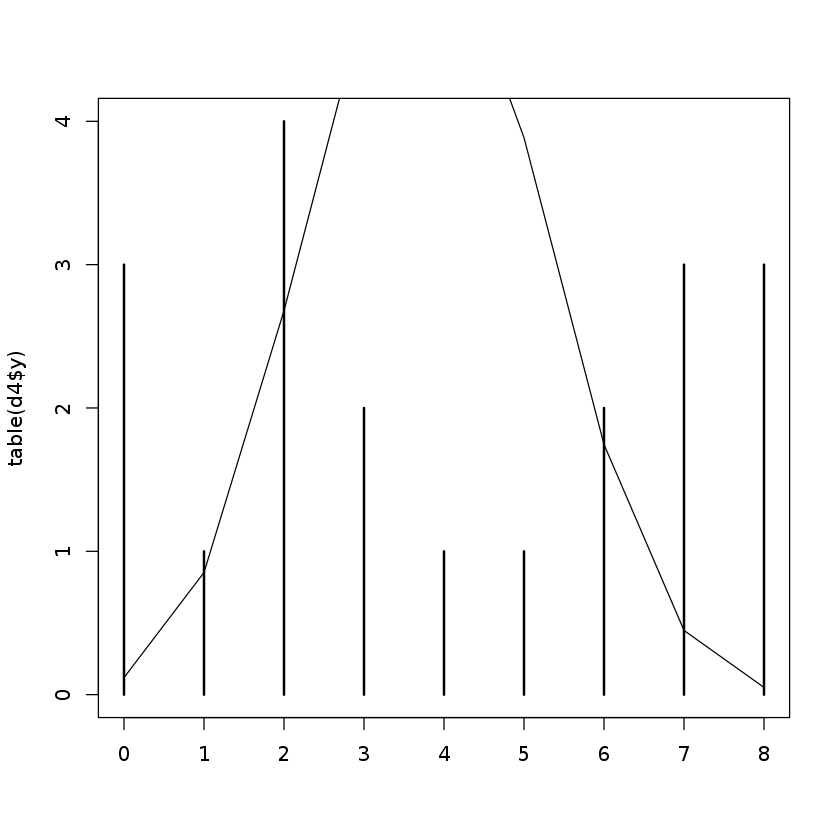

In [4]:
d4 <- d[d$x==4,]
summary(d4)
plot(table(d4$y))
y <- seq(0, 8, 1)
lines(y, dbinom(y, mean(d$N), logistic(-2.1487 + 0.5104 * 4)) * length(d4$y))

だいぶ二項分布とは異なる趣になっている。

# 過分散と個体差

In [5]:
c(mean(d4$y), var(d4$y))

[1] 4.050000 8.365789

であり、平均は 4.05/8=0.5 くらいで、分散は 8 * 0.5 * (1-0.5) = 2 くらいになるはずなのに、実際の分散は 8.4 と大きい。
個体が持つ要因によって予想よりも分散が大きくなってしまっている。→実際の現象ではよく起こること。
そこで、個体差を表すパラメタ $r_i$ を線形予測子に導入する。

In [8]:
library(glmmML)
glmmML(cbind(y, N-y) ~ x, data=d, family=binomial, cluster=id)


Call:  glmmML(formula = cbind(y, N - y) ~ x, family = binomial, data = d,      cluster = id) 


              coef se(coef)      z Pr(>|z|)
(Intercept) -4.190   0.8777 -4.774 1.81e-06
x            1.005   0.2075  4.843 1.28e-06

Scale parameter in mixing distribution:  2.408 gaussian 
Std. Error:                              0.2202 

        LR p-value for H_0: sigma = 0:  2.136e-55 

Residual deviance: 269.4 on 97 degrees of freedom 	AIC: 275.4 